In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn import metrics

In [4]:
import statsmodels.api as sm

In [5]:
def logistic(t):
    return 1.0/(1+math.exp(-1.0*t))

In [6]:
t= np.linspace(-6,6,500)

In [7]:
y = np.array([logistic(ele) for ele in t])

Text(0.5,1,'Logistic Function')

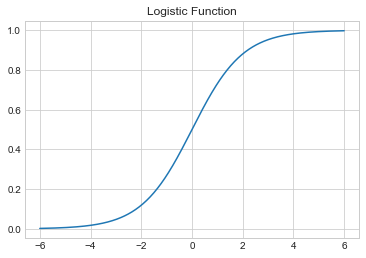

In [8]:
plt.plot(t,y)
plt.title('Logistic Function')

In [9]:
df = sm.datasets.fair.load_pandas().data

In [10]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [11]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [12]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [13]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [14]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


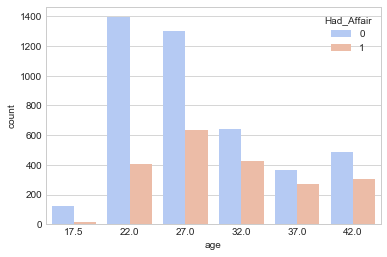

In [15]:
sns.countplot('age', data=df.sort_values('age'), hue='Had_Affair', palette='coolwarm')

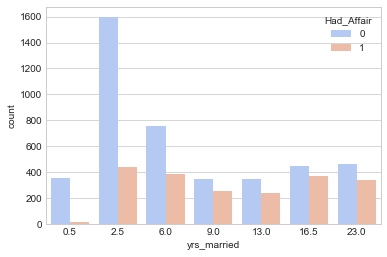

In [16]:
sns.countplot('yrs_married', data=df.sort_values('yrs_married'), hue='Had_Affair', palette='coolwarm')

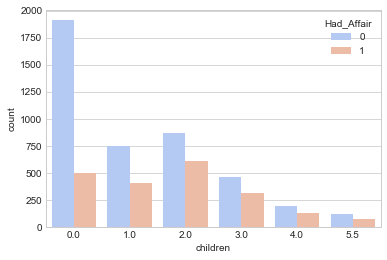

In [17]:
sns.countplot('children', data=df.sort_values('children'), hue='Had_Affair', palette='coolwarm')

In [18]:
occ_dummies = pd.get_dummies(df.occupation)

In [19]:
hus_occ_dummies = pd.get_dummies(df.occupation_husb)

In [20]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [21]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [22]:
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis=1)

In [23]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [24]:
X = pd.concat([X,dummies],axis=1)

In [25]:
Y = df.Had_Affair

In [26]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [27]:
X = X.drop('occ1',axis=1)

In [28]:
X = X.drop('hocc1',axis=1)

In [29]:
X = X.drop('affairs', axis=1)

In [30]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [34]:
Y = np.ravel(Y)

In [35]:
log_model = LogisticRegression()

In [36]:
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
log_model.score(X,Y)

0.7258875274897895

In [38]:
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T

In [39]:
coeff_df

,0,1
0,rate_marriage,-0.697885
1,age,-0.056347
2,yrs_married,0.103906
3,children,0.0181728
4,religious,-0.368496
5,educ,0.00878983
6,occ2,0.297979
7,occ3,0.607916
8,occ4,0.346038
9,occ5,0.942365


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [41]:
log_model2 = LogisticRegression()

In [42]:
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
class_predict = log_model2.predict(X_test)

In [44]:
class_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
metrics.accuracy_score(Y_test, class_predict)

0.7198492462311558